<a href="https://colab.research.google.com/github/HOWARD258ym/HOWARD258ym/blob/main/%E3%80%8Cback_propagation_practice_multi_dimensional_inputs_outputs_batch_processing_PyTorch_Class%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

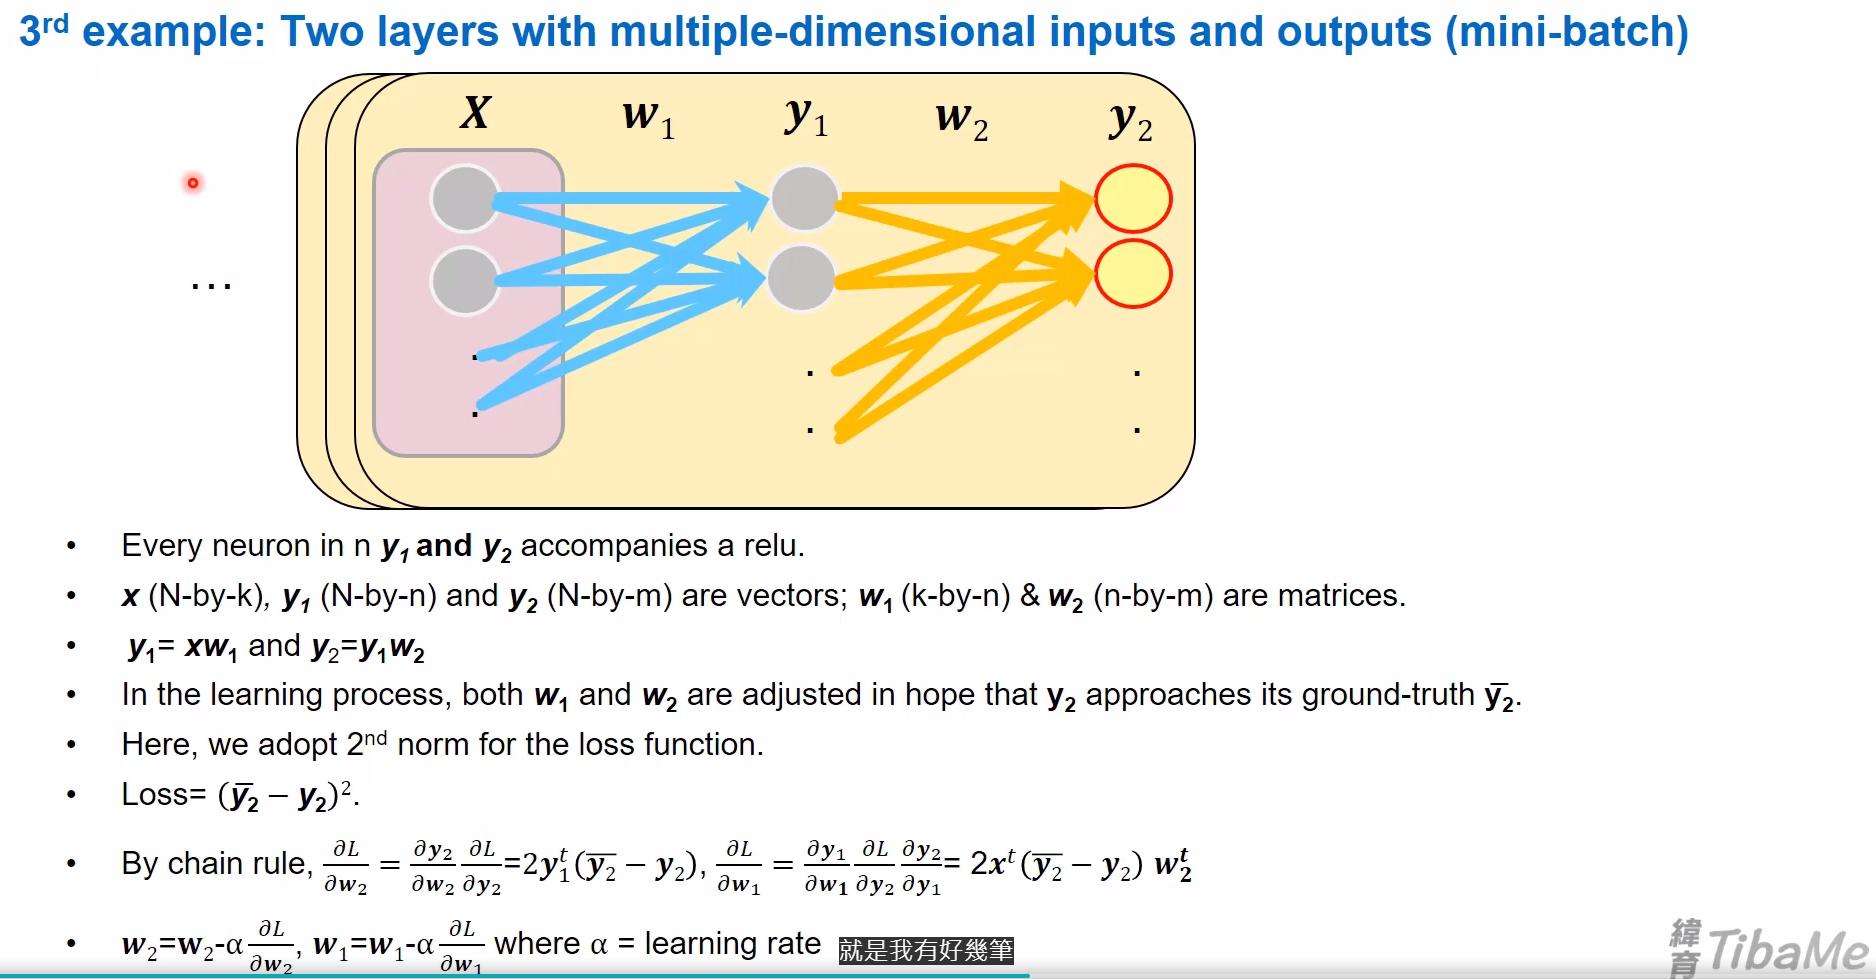

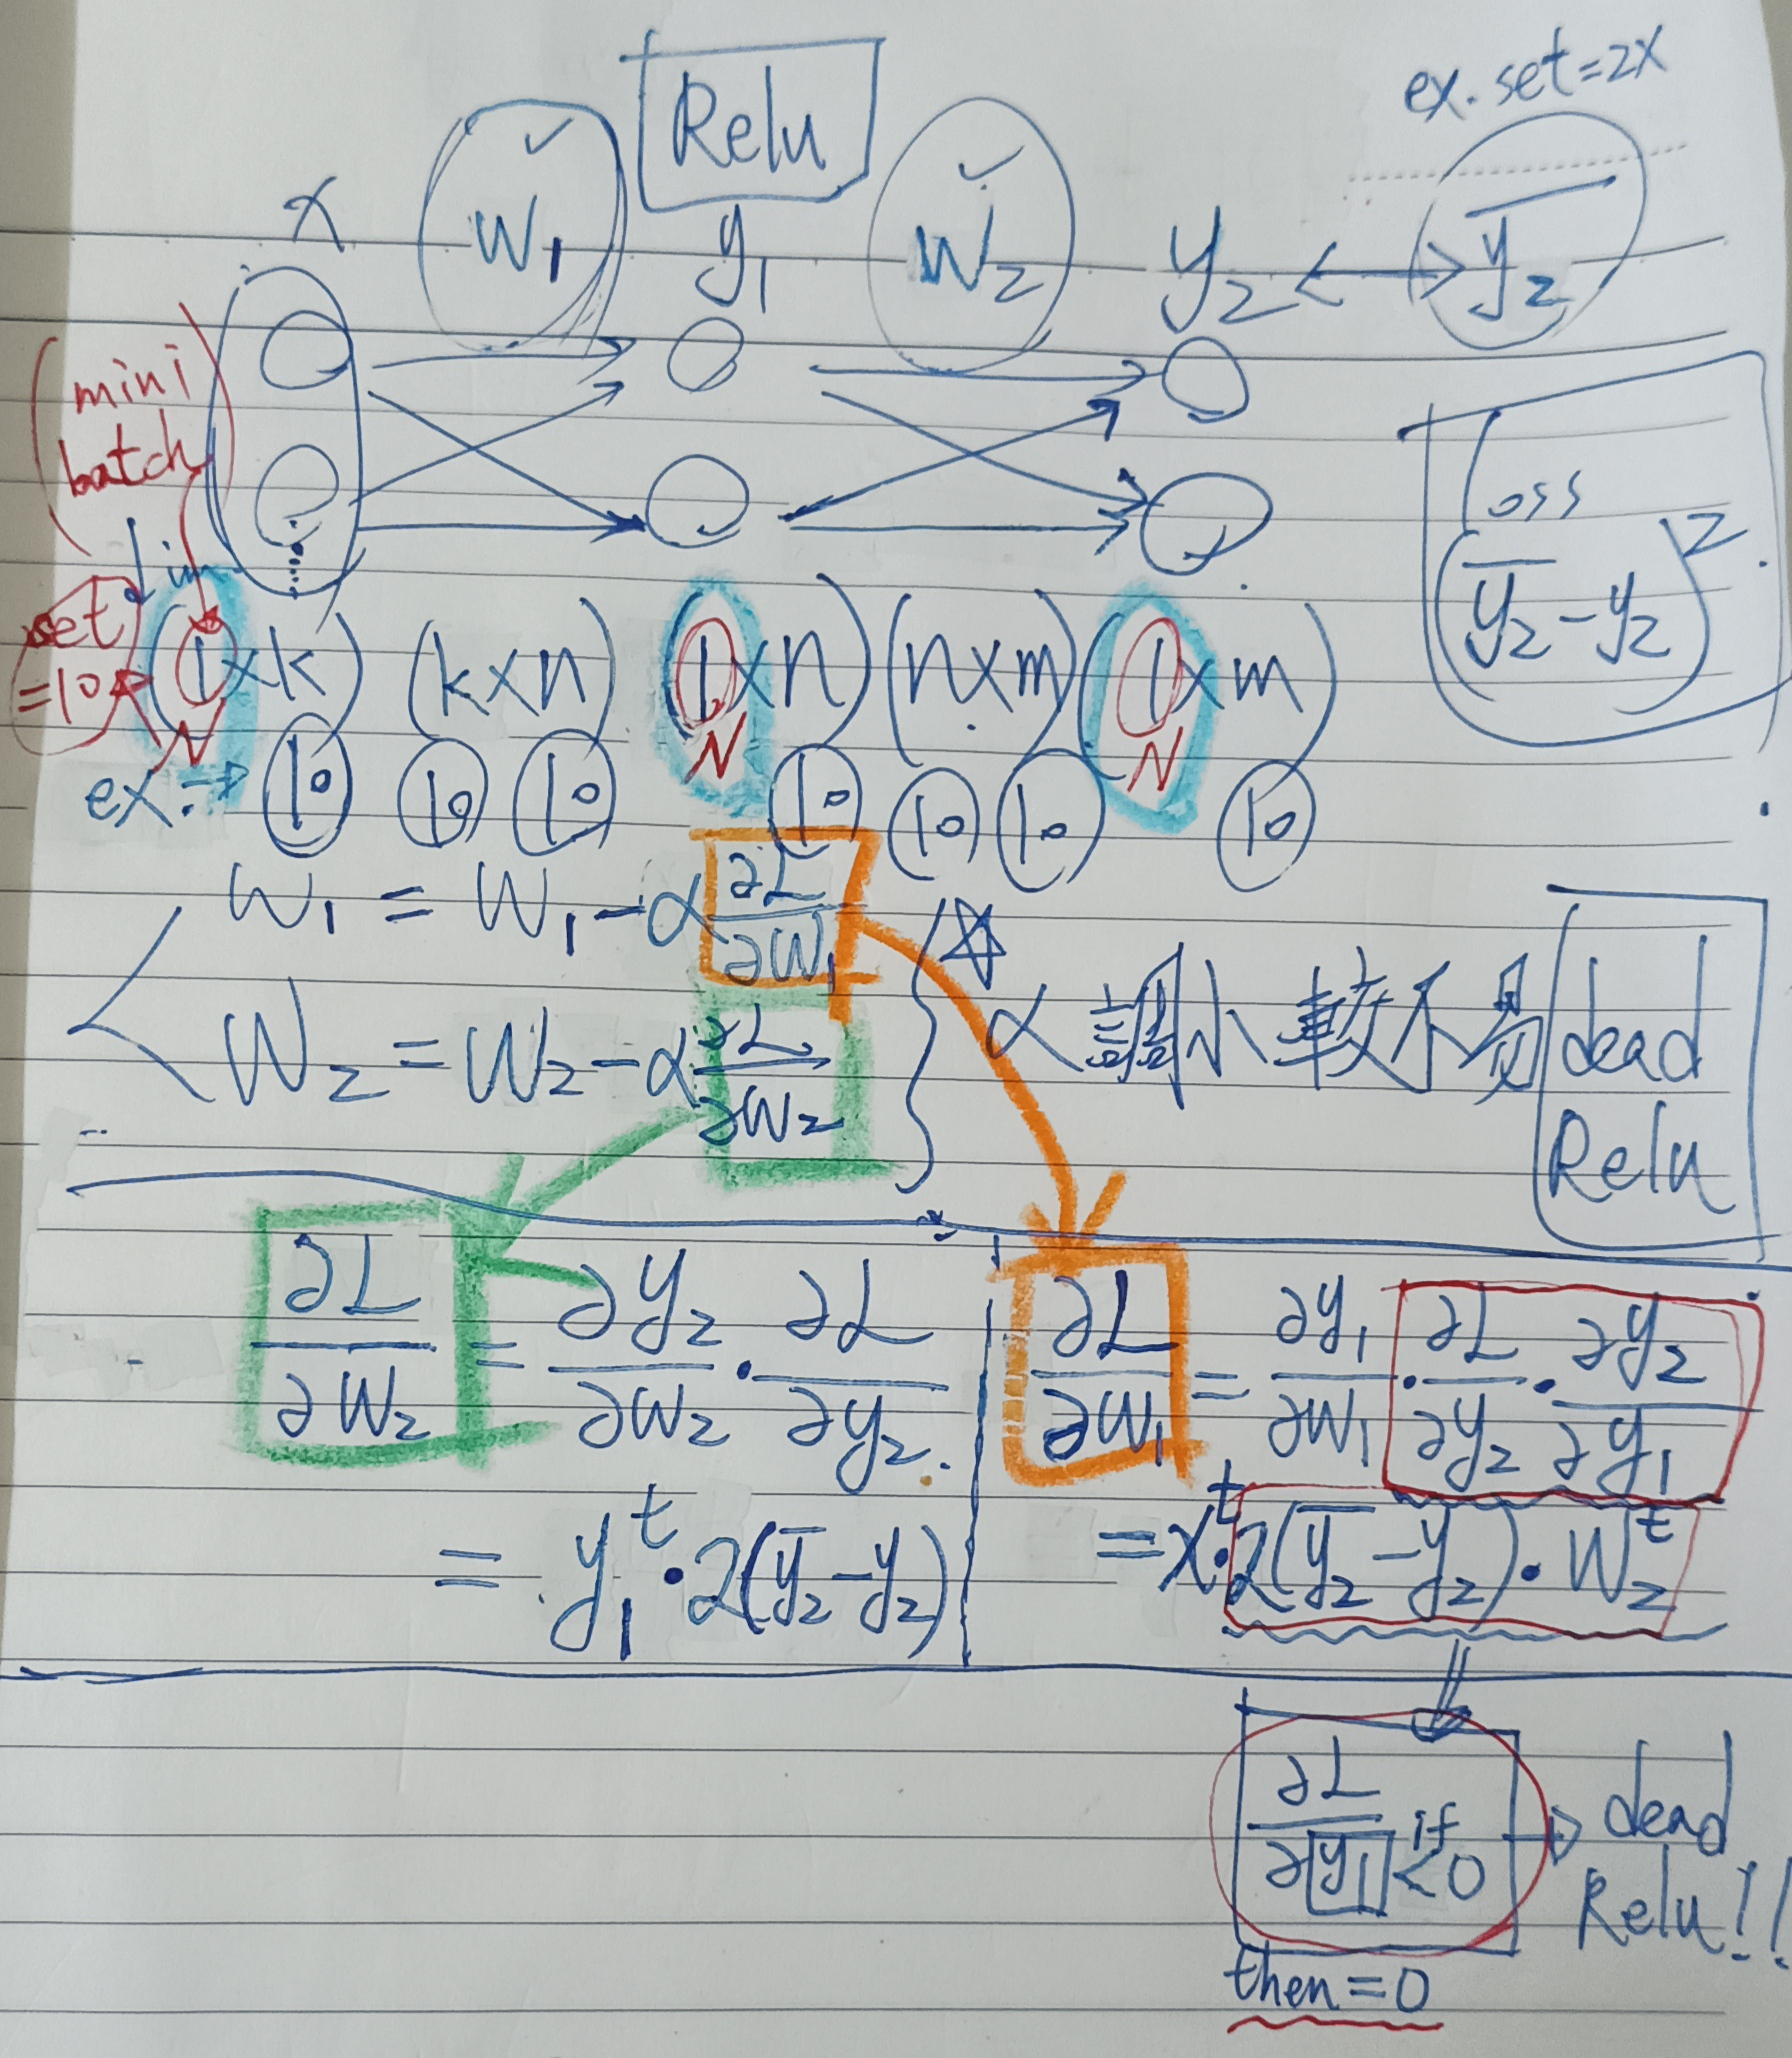

299999 4.714516496044366


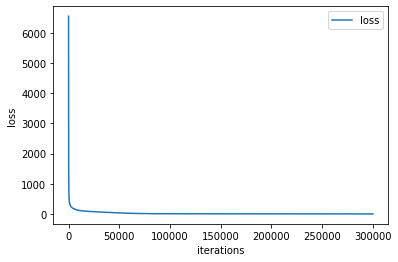

In [5]:
# This example is written for demonstrating a two-layer CNN giving multi-dimensional inputs and outputs in the sense of mini-batch.
# Only a relu is put after the 1st layer.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

# fix random No.
np.random.seed(20)

# setting 1
x = np.random.randn(10, 10)
# setting 2
#x = np.ones(100)
#x = x.reshape(10,10)


# setting 1
y2_GT = 2*np.random.randn(10, 10)
# setting 2
#y2_GT = 2*np.ones(100)
#y2_GT = y2_GT.reshape(10,10)

#print("input vector")
#print(x)
#print("goal of learning=" )
#print(y2_GT)

# setting 1: Randomly initialize weights
w1 = np.random.randn(10, 10)
w2 = np.random.randn(10, 10)
# setting 2
#w1 = np.ones(100)
#w1 = w1.reshape(10,10)
#w2 = np.ones(100)
#w2 = w2.reshape(10,10)


# setting 1
#learning_rate = 0.001 
#iterations=300 # 5000 would entirely fit the input
# setting 2
learning_rate = 0.00001 
iterations=300000 

# for displaying the variation of weighting of 1st layer and 2nd layer
w1_history= np.zeros(iterations)
w2_history= np.zeros(iterations)
# for displaying the output of the 1st layer
y1_history= np.zeros(iterations)
loss_history= np.zeros(iterations)


for t in range(iterations):
    # 1st layer inference        
    y1 = x.dot(w1)
    
    # doing relu for the output of 1st layer
    y1_relu = np.maximum(y1, 0) # result is a matrix

    #print "y1_relu="    
    #print y1_relu

    # performing 2nd layer computation
    y2_pred = y1_relu.dot(w2) # result is a row vector

    # Compute and print loss
    loss = np.square(y2_pred - y2_GT).sum()
    #print y_pred.shape
    #print np.mean(y_pred)
    loss_history[t]=loss
    #print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y2_pred = 2.0 * (y2_pred - y2_GT) # d_loss/d_y2        
    grad_w2 = y1_relu.T.dot(grad_y2_pred)# (d_y2/d_w2)*(d_loss/d_y2)=d_loss/d_w2    
    grad_y1_relu = grad_y2_pred.dot(w2.T) # (d_loss/d_y2)*(d_y2/d_y1)=d_loss/d_y1
    grad_y1 = grad_y1_relu.copy()
    grad_y1[y1 < 0] = 0 # only numbers through relu would be conducted backward pass
    grad_w1 = x.T.dot(grad_y1) # (d_y1/d_w1)*(d_loss/d_y2)*(d_y2/d_y1)=(d_y1/d_w1)*(d_loss/d_y1)=d_loss/d_w1

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
            
print(t, loss)

#print("y_expected")
#print(y2_GT)

#print("y2_pred")
#print(y2_pred)

input_epoch = np.array(range(iterations))

plt.plot(input_epoch,loss_history)
plt.legend(['loss'])
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()


# {setting 1}
#learning_rate = 0.001 
#iterations=300( 5000 would entirely fit the input

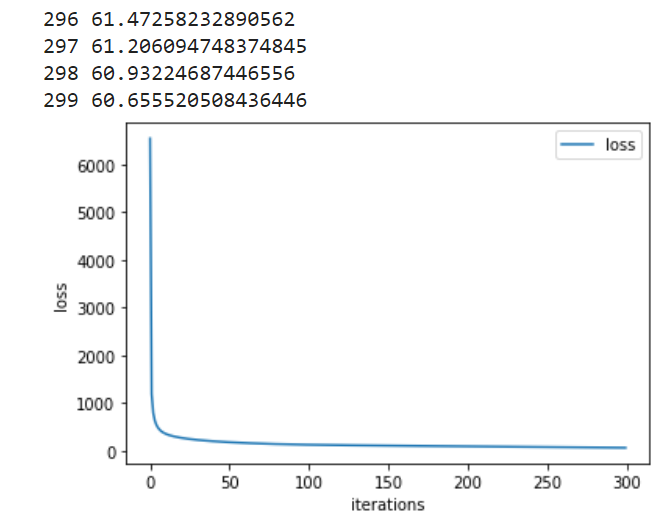

# {setting 2}
# learning_rate = 0.00001 
# iterations=300 (300000 would entirely fit the input; 300 is not enough.

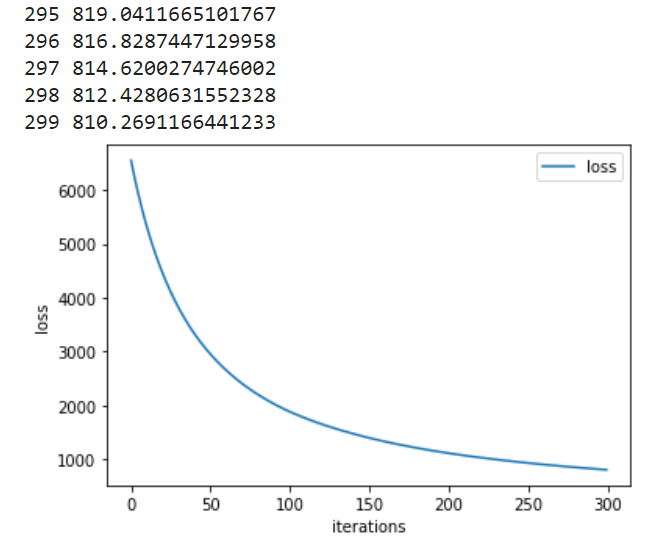

# {setting 3}
# learning_rate = 0.00001 
# iterations=300000 (entirely fit the input; 300 is not enough.

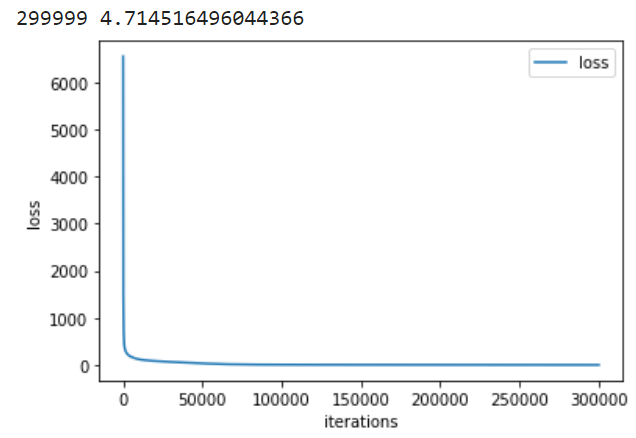